In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

# Read CSV file

In [3]:
data = pd.read_csv('C:/Users/IBRAHIM/Desktop/T5 Bootcamp/Classification Project/gender_classification.csv')
print(data.shape)
data.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# finding Null data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# describing the statistic infromation from the data

In [5]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


# EDA on the DATA 

scatter to show forehead width based on gender

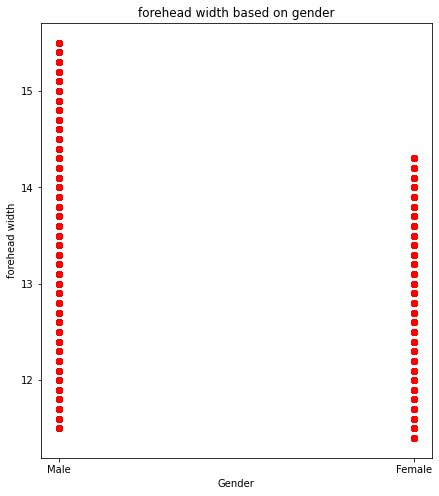

In [6]:
df1 = pd.DataFrame(data)
  
A = list(df1.gender)
B = list(df1.forehead_width_cm)

plt.figure(figsize=(7,8))
plt.scatter(A,B,color='red')
plt.title("forehead width based on gender")
plt.xlabel("Gender")
plt.ylabel("forehead width")

plt.show()

count of Nose Long by gender

<AxesSubplot:title={'center':'count of Nose Long colored by gender'}, xlabel='nose_long', ylabel='count'>

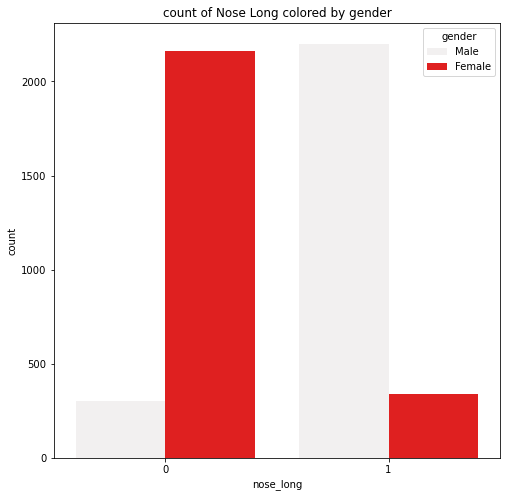

In [7]:
plt.figure(figsize=(8,8))
plt.title('count of Nose Long colored by gender')
sns.countplot(data=data,x='nose_long',hue='gender',color='red')

<AxesSubplot:title={'center':'forehead width And forehead height classified by gender'}, xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

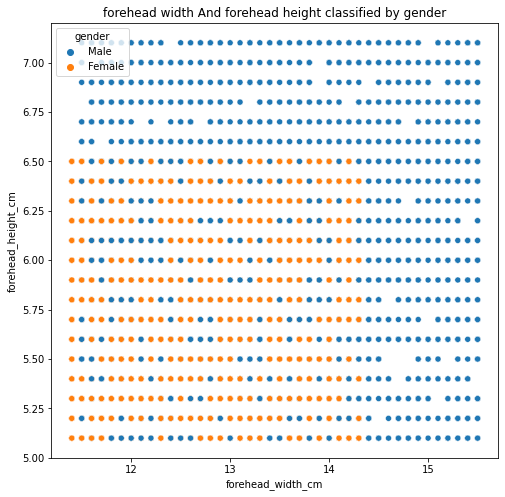

In [8]:
plt.figure(figsize=(8,8))
plt.title('forehead width And forehead height classified by gender')
sns.scatterplot(x='forehead_width_cm',y='forehead_height_cm',hue='gender',data=data)

# Target is Gender and the other columns are features

In [9]:
df = data.copy()
df['gender'] = df.gender.replace({0:'Male',1:'Female'}).astype('object')
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

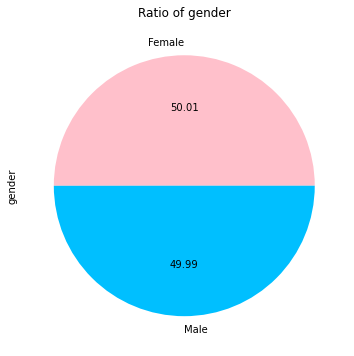

In [10]:
explode=[0,0.1]
data['gender'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(8,6),colors=['pink', '#00BFFF'])
plt.title('Ratio of gender')
plt.show()

# So my data are blanced

In [11]:
df_female.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1,0,14.0,5.4,0,0,1,0,Female
4,1,13.5,5.9,0,0,0,0,Female
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [12]:
df_male.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male


<AxesSubplot:>

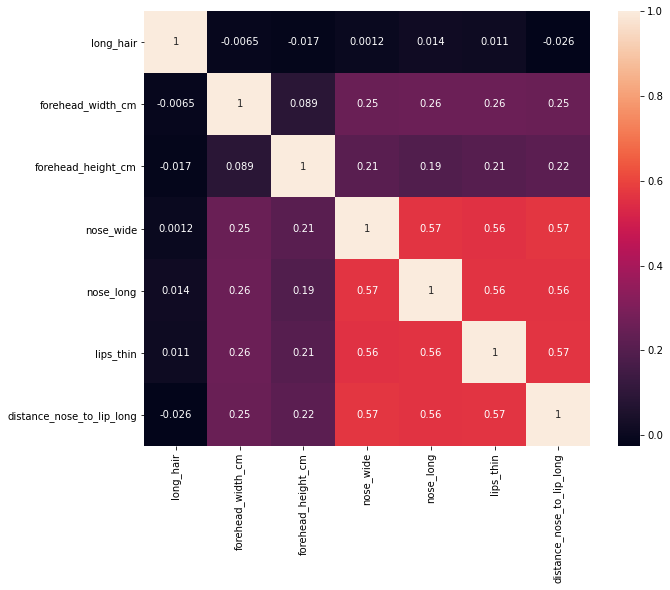

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

# Drop the Gender columns from the data because it is my target

In [14]:
X = df.drop('gender', axis = 1)
y = df['gender']

In [15]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [16]:
y.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

# spliting the data into train and test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

# KNN

In [18]:
print(y_train.shape)
print(y_test.shape)

(3750,)
(1251,)


In [19]:
print(X_train.shape)
print(X_test.shape)

(3750, 7)
(1251, 7)


In [20]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9624300559552358


# Cross Validation

In [21]:

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=25, scoring='accuracy')
print(scores)

[0.94029851 0.975      0.955      0.97       0.95       0.965
 0.945      0.975      0.95       0.96       0.955      0.98
 0.99       0.97       0.99       0.985      0.98       0.94
 0.985      0.955      0.98       0.98       0.97       0.965
 0.975     ]


In [22]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9610107784431138, 0.9616095808383232, 0.9676095808383234, 0.9680091816367267, 0.9674091816367264, 0.9686087824351297, 0.966210379241517, 0.9674099800399201, 0.9674103792415171, 0.96880998003992, 0.9690095808383233, 0.9704091816367265, 0.9710091816367266, 0.9712087824351296, 0.9718091816367265, 0.9718087824351297, 0.973008383233533, 0.9720079840319361, 0.9714087824351296, 0.9726083832335328, 0.972008383233533, 0.973607984031936, 0.973408383233533, 0.974007984031936, 0.973408383233533, 0.974207984031936, 0.9736083832335328, 0.9736079840319363, 0.9732079840319361, 0.973607984031936]


In [23]:
np.mean(k_scores)

0.9704355821689954

Text(0, 0.5, 'Cross-Validated Accuracy')

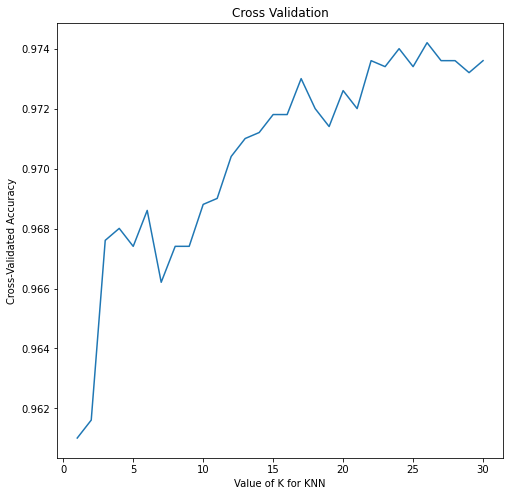

In [24]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.plot(k_range, k_scores)
plt.title('Cross Validation')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# GridSearchCV

In [25]:
forest_params = [{'n_neighbors': list(range(1, 10))}]

clf = GridSearchCV(knn, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)
knn_bestmodel=clf.best_estimator_

{'n_neighbors': 9}
0.9712


# confusion_matrix

In [26]:
confusion_matrix(y_test, knn_bestmodel.predict(X_test))

array([[612,  14],
       [ 26, 599]], dtype=int64)

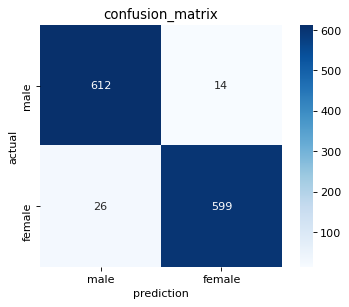

In [27]:
knn_confusion = confusion_matrix(y_test,knn_bestmodel.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['male', 'female'],
           yticklabels=['male', 'female']);
plt.title('confusion_matrix')
plt.xlabel('prediction')
plt.ylabel('actual');

# Classifier

In [28]:
dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dc.predict_proba(X_test))))
?DummyClassifier

Log-loss on dummy classifier: 0.6931


In [29]:
lm = LogisticRegression(C = 100)
lm.fit(X_train, y_train)

LogisticRegression(C=100)

In [30]:
print("Logistic accuracy: {:6.4f}".format(lm.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, y_test)))

Logistic accuracy: 0.9616
Dummy accuracy: 0.5004
